In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import glob
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go

# from Bio import SeqIO

import gzip
import h5py
import scanpy as sc
import scipy
import mira
import torch

/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mira.__version__,torch.__version__

('2.1.1', '2.0.0+cu117')

In [4]:
import logging
import warnings
mira.utils.pretty_sderr()

In [6]:
%matplotlib inline

In [7]:
torch.cuda.is_available()

True

In [8]:
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_properties(i).name)

NVIDIA A100-PCIE-40GB


In [9]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA A100-PCIE-40GB', major=8, minor=0, total_memory=40396MB, multi_processor_count=108)

In [1]:
cd /media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output

/media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output


In [3]:
pwd

'/media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output'

# merge samples

In [12]:
filenames = glob.glob("/media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output/*/sample_filtered_feature_bc_matrix.h5")

adatas=[]
for filename in filenames:
    adatas.append(sc.read_10x_h5(filename))
    adatas[-1].var_names_make_unique()
    adatas[-1].obs['group']=filename.split('/')[-2]
    

adata = adatas[0].concatenate(adatas[1:],index_unique=None)

adata

/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/media/RAIDArray/Nick/miniconda3/envs/mira-e

AnnData object with n_obs × n_vars = 36248 × 38606
    obs: 'group', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

In [16]:
adata.obs['group'].unique()

array(['D4_spib_r1', 'D6_irf8_r2', 'D4_irf8_r2', 'D6_prdm1_r2',
       'D6_irf4_r2', 'D6_spib_r2', 'D6_spib_r1', 'D4_spib_r2',
       'D4_prdm1_r2', 'D6_batf_r2', 'D4_batf_r2', 'D4_irf4_r2'],
      dtype=object)

In [20]:
adata.obs.group.unique()

array(['D6_spib_r2', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2',
       'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2',
       'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1',
       'D6_spib_r1'], dtype=object)

In [18]:
import pandas as pd
import anndata as ad

# Assuming 'adata' is your AnnData object

def remove_var_columns(adata: ad.AnnData, columns_to_remove: list[str]):
  """
  Removes specified columns from the .var DataFrame of an AnnData object.

  Args:
      adata: The AnnData object.
      columns_to_remove: A list of column names to remove.
  """

  var_columns = adata.var.columns
  columns_to_keep = [col for col in var_columns if col not in columns_to_remove]
  adata.var = adata.var[columns_to_keep]


# Example usage:
columns_to_remove = ['pattern', 'read', 'sequence']  # List of columns to remove
remove_var_columns(adata, columns_to_remove)

print(adata.var.columns)  # Print the remaining columns to verify

Index(['gene_ids', 'feature_types', 'genome'], dtype='object')


In [24]:
adata.var

gene_ids    feature_types  genome
DDX11L2          ENSG00000290825  Gene Expression  GRCh38
MIR1302-2HG      ENSG00000243485  Gene Expression  GRCh38
FAM138A          ENSG00000237613  Gene Expression  GRCh38
ENSG00000290826  ENSG00000290826  Gene Expression  GRCh38
OR4F5            ENSG00000186092  Gene Expression  GRCh38
...                          ...              ...     ...
ENSG00000277836  ENSG00000277836  Gene Expression  GRCh38
ENSG00000278633  ENSG00000278633  Gene Expression  GRCh38
ENSG00000276017  ENSG00000276017  Gene Expression  GRCh38
ENSG00000278817  ENSG00000278817  Gene Expression  GRCh38
ENSG00000277196  ENSG00000277196  Gene Expression  GRCh38

[38606 rows x 3 columns]

In [20]:
adata.write("/media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output/tf_perturbseq_rep2_post_cellranger.h5ad")

... storing 'group' as categorical
/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
... storing 'feature_types' as categorical
/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
... storing 'genome' as categorical


# SCANPY preprocessing

In [21]:
adata = sc.read_h5ad("/media/RAIDArray/Nick/20240206_PerturbSeq_Exp2/cellranger_output/tf_perturbseq_rep2_post_cellranger.h5ad")
adata

/media/RAIDArray/Nick/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 36248 × 38606
    obs: 'group', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=20)

/ix/djishnu/peasena/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/ix/djishnu/peasena/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [21]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [22]:
adata

AnnData object with n_obs × n_vars = 40571 × 22950
    obs: 'group', 'batch', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt'

In [23]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'group' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'pattern' as categorical
... storing 'read' as categorical
... storing 'sequence' as categorical


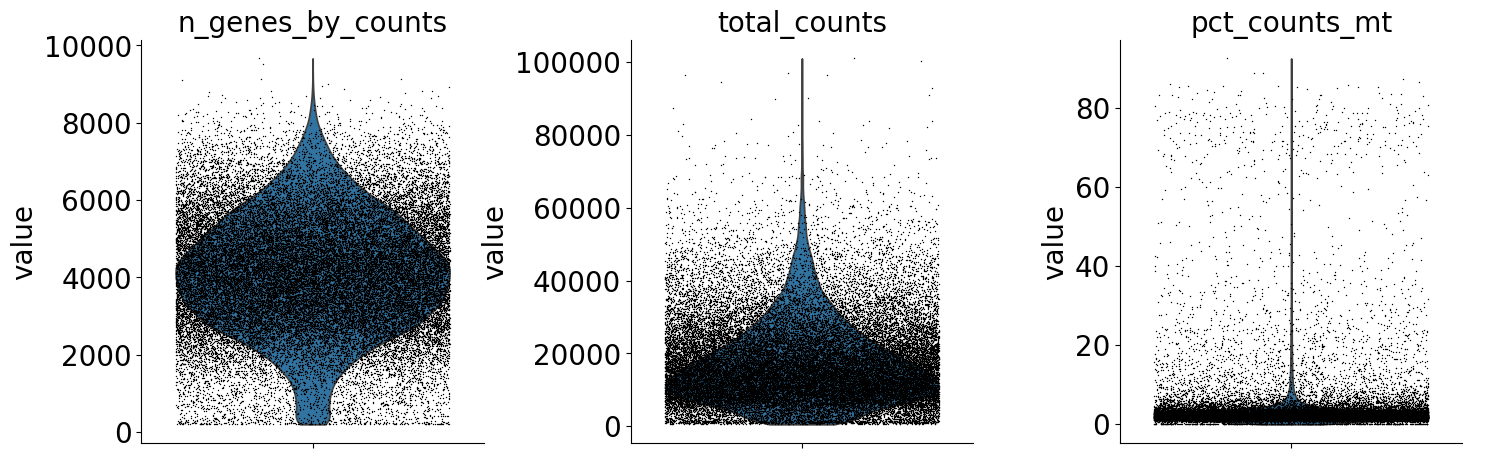

In [24]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4,
             multi_panel=True
            )

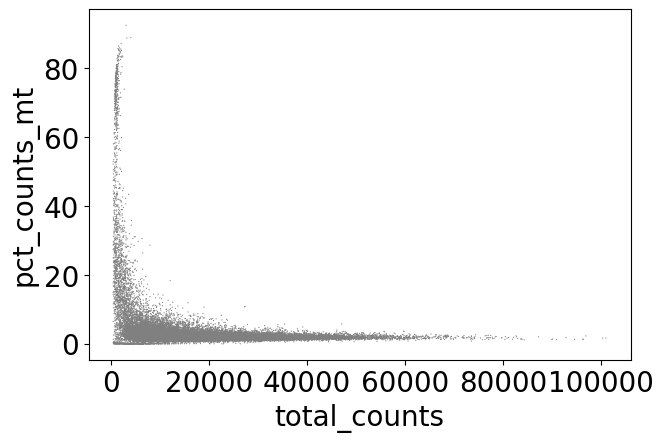

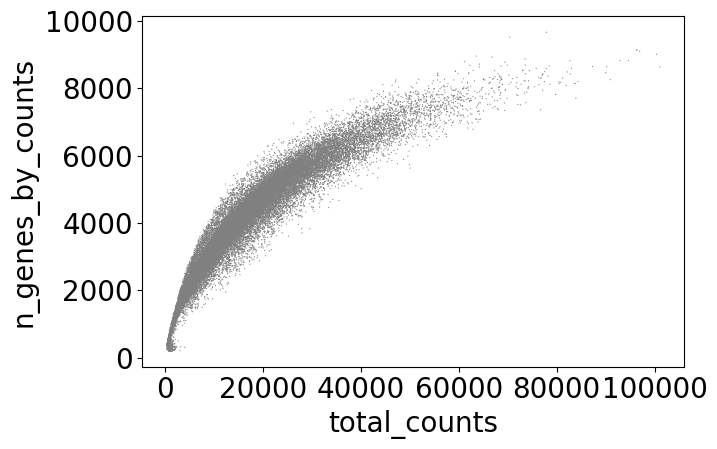

In [25]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [26]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [27]:
adata

View of AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [28]:
adata.write('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/merged.h5ad')

# MIRA

In [3]:
adata=sc.read_h5ad("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/merged.h5ad")

/ix/djishnu/peasena/miniconda3/envs/mira-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
adata.var['gene_ids'].head(200)

ENSG00000238009    ENSG00000238009
ENSG00000241860    ENSG00000241860
ENSG00000290385    ENSG00000290385
ENSG00000291215    ENSG00000291215
LINC01409          ENSG00000237491
                        ...       
MAD2L2             ENSG00000116670
FBXO6              ENSG00000116663
DRAXIN             ENSG00000162490
AGTRAP             ENSG00000177674
C1orf167           ENSG00000215910
Name: gene_ids, Length: 200, dtype: object

In [22]:
adata.obs_names_make_unique()

In [23]:
rawdata = adata.X.copy()

In [24]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [25]:
adata.layers['counts'] = rawdata

In [26]:
sc.pp.highly_variable_genes(adata, min_disp = 0.2)

In [14]:
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pp.highly_variable_genes(adata, min_disp = 0.2)

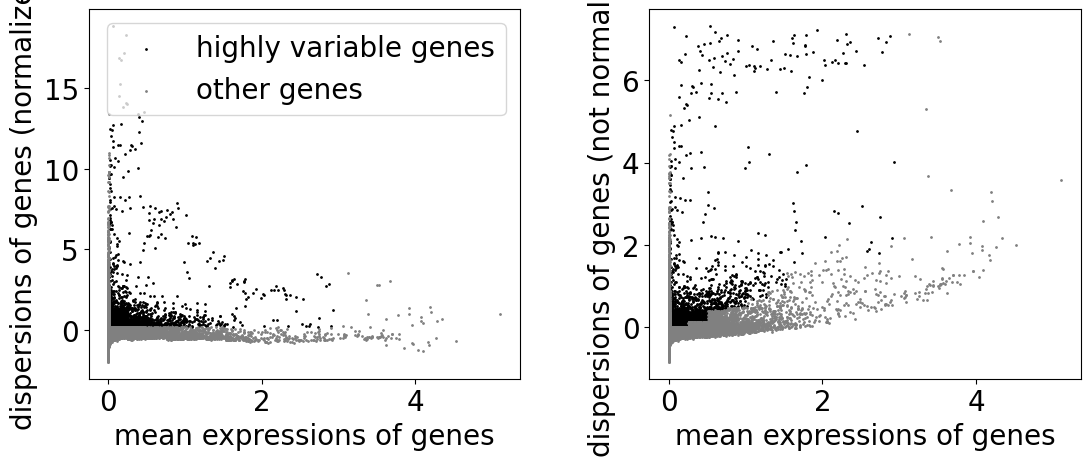

In [27]:
sc.pl.highly_variable_genes(adata)

In [28]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [29]:
adata.var['highly_variable'].value_counts()

highly_variable
False    20379
True      2571
Name: count, dtype: int64

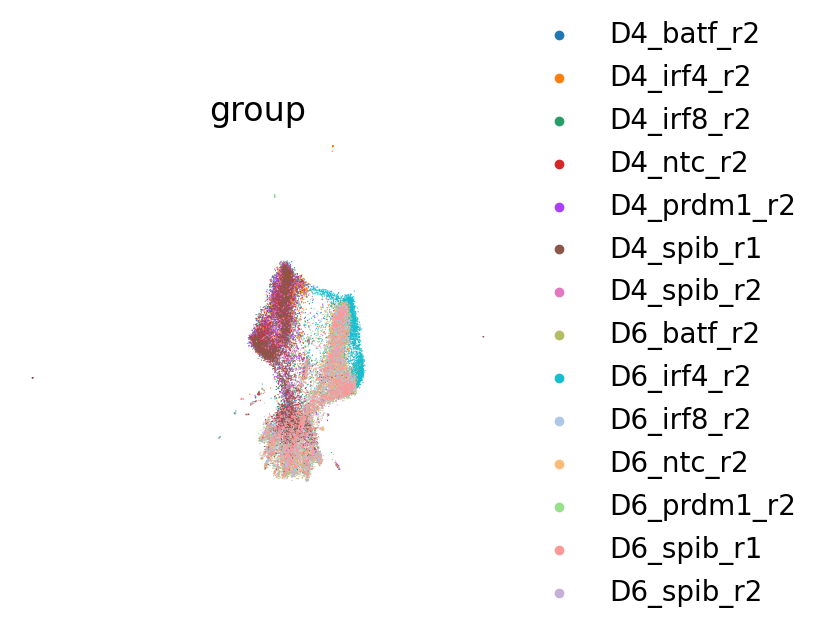

In [30]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata, min_dist = 0.2, negative_sample_rate=0.2)
sc.pl.umap(adata, color = 'group', frameon=False)

In [31]:
model = mira.topics.make_model(
    adata.n_obs, adata.n_vars, # helps MIRA choose reasonable values for some hyperparameters which are not tuned.
    feature_type = 'expression',
    highly_variable_key='highly_variable',
    counts_layer='counts',
#     categorical_covariates='batch'
)

In [32]:
model.get_learning_rate_bounds(adata)

INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: highly_variable


Learning rate range test:   0%|          | 0/98 [00:00<?, ?it/s]

INFO:mira.topic_model.base:Set learning rates to: (4.276669854102657e-06, 0.3371937212064825)


(4.276669854102657e-06, 0.3371937212064825)

<Axes: xlabel='Learning Rate', ylabel='Loss'>

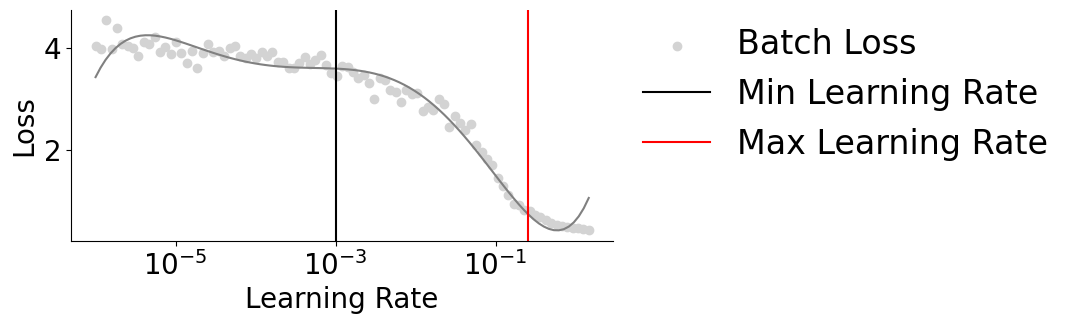

In [38]:
model.set_learning_rates(1e-3, 0.25)
model.plot_learning_rate_bounds(figsize=(7,3))

# Hyperparameter Optimization: Gradient based

In [39]:
#takes a long time (30min)
topic_contributions = mira.topics.gradient_tune(model, adata)

Training model:   0%|          | 0/24 [00:00<?, ?it/s]

Predicting latent vars:   0%|          | 0/140 [00:00<?, ?it/s]

In [52]:
with open('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/topic_contributions.txt', 'w') as file:
    file.write('\n'.join(str(topic) for topic in topic_contributions))

<Axes: xlabel='Topic Number', ylabel='Max contribution'>

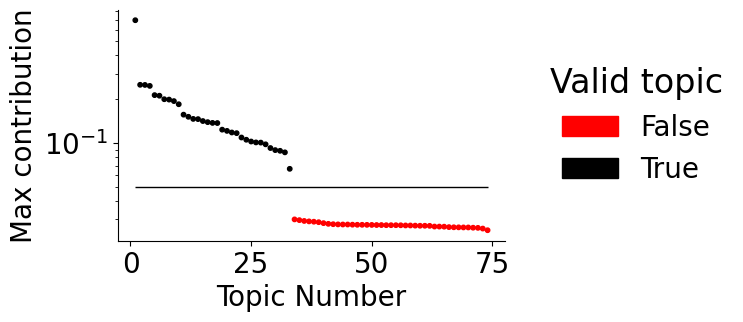

In [46]:
NUM_TOPICS = 33

mira.pl.plot_topic_contributions(topic_contributions, NUM_TOPICS)

In [56]:
#takes ~5-10min
model = model.set_params(num_topics = NUM_TOPICS).fit(adata)

INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: highly_variable


Training model:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:mira.topic_model.base:Moving model to device: cpu


In [7]:
#reload model if needed
model = mira.topic_model.load_model('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/models/expression_model_tuner/base.pth')

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [38]:
model

dirichlet_expression_model(
  (decoder): Decoder(
    (beta): Linear(in_features=33, out_features=2571, bias=False)
    (bn): BatchNorm1d(2571, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop1): Dropout(p=0.05, inplace=False)
    (drop2): Dropout(p=0.055, inplace=False)
  )
  (encoder): ExpressionEncoder(
    (fc_layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=2572, out_features=512, bias=False)
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.01, inplace=False)
      )
      (1): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=False)
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.01, inplace=False)
      )
      (2): Sequential(
        (0): Linear(in_features=512, out_features=68, bias=False)
        (1): BatchNorm1d(68, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
)

# Hyperparameter Optimization: Bayesian

In [43]:
#reload adata if needed
adata=sc.read_h5ad("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/merged_gradient_topicmodel.h5ad")

In [39]:
tuner = mira.topics.BayesianTuner(
        model = model,
        n_jobs=2,
        save_name = '/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/expression_model_tuner',
        #### IMPORTANT
        min_topics = 35, max_topics = 37, # tailor for your dataset!!!! (+/- 10 from the above topic number)
        #### See "Notes on min_topics, max_topics" above
        #storage = mira.topics.Redis() # if using REDIS backend for more (>5) processes
)

In [44]:
#takes the longest (~2-4hrs)
tuner.fit(adata)

Trials finished: 13 | Best trial: 1 | Best score: 1.7001e+03
Press ctrl+C,ctrl+C or esc,I+I,I+I in Jupyter notebook to stop early.

Tensorboard logidr: /ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/expression_model_tuner
#Topics | #Trials 

     35 | ■ 
     36 | ■ ■ ■ ■ ■ 
     37 | ■ ■ ■ 

Trial | Result (● = best so far)         | Params
 #0   |   | pruned at step: 8            | {'decoder_dropout': 0.0540, 'num_topics': 37}
 #1   | ● | completed, score: 1.7001e+03 | {'decoder_dropout': 0.0615, 'num_topics': 37}
 #2   |   | pruned at step: 8            | {'decoder_dropout': 0.0514, 'num_topics': 36}
 #3   |   | pruned at step: 8            | {'decoder_dropout': 0.0573, 'num_topics': 36}
 #4   |   | pruned at step: 8            | {'decoder_dropout': 0.0641, 'num_topics': 36}
 #5   |   | pruned at step: 7            | {'decoder_dropout': 0.0605, 'num_topics': 37}
 #6   |   | pruned at step: 8            | {'decoder_dropout': 0.0541, 'num_topics': 36}
 #7   |   | prune

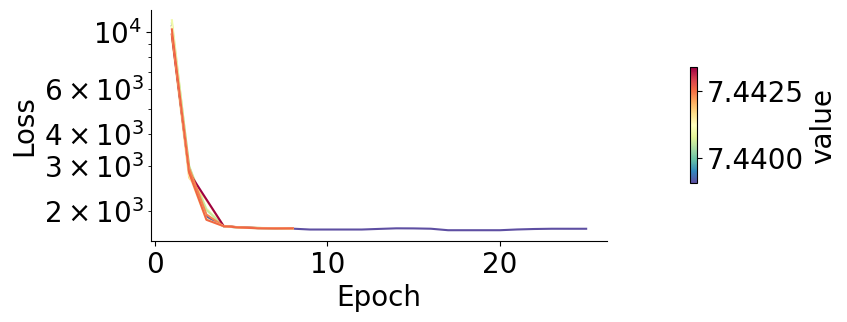

In [45]:
ax = tuner.plot_intermediate_values(palette='Spectral_r',
                                   log_hue=True, figsize=(7,3))
# ax.set(ylim = (7e2, 7.7e2))

<Axes: xlabel='Num_topics', ylabel='Elbo'>

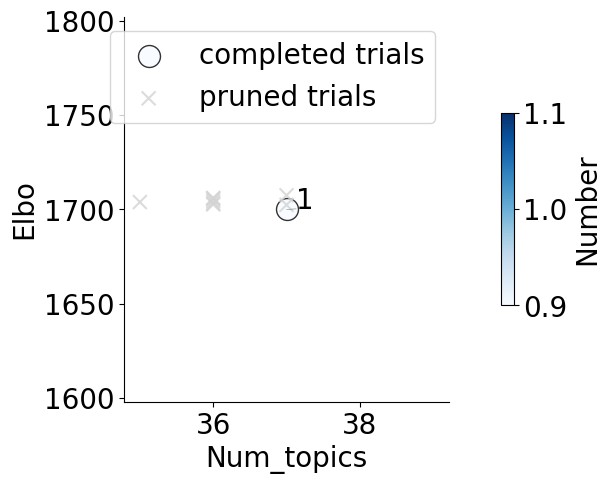

In [46]:
tuner.plot_pareto_front(include_pruned_trials=False, label_pareto_front=True,
                       figsize = (5,5))

In [47]:
model = tuner.fetch_best_weights()

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [48]:
model.save('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/mira_model_240401.pth')

In [49]:
#uses topic model to predict for each cell
model.predict(adata)


Predicting latent vars:   0%|          | 0/140 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24, topic_25, topic_26, topic_27, topic_28, topic_29, topic_30, topic_31, topic_32, topic_33, topic_34, topic_35, topic_36
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [8]:
#reload model if needed
model = mira.topic_model.load_model('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/mira_model_240401.pth')

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [9]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',

In [11]:
# add day
cond = []
for x in adata.obs.group:
    x = x[0:2]
    if x == 'D4':
        cond.append('D4')
    elif x == 'D6':
        cond.append('D6')

adata.obs['day'] = cond

In [12]:
# add knockout
cond = []
for x in adata.obs.group:
    x = x.split('_')[1]
    if x == 'batf':
        cond.append('BATF')
    elif x == 'irf4':
        cond.append('IRF4')
    elif x == 'irf8':
        cond.append('IRF8')
    elif x == 'ntc':
        cond.append('Control')
    elif x == 'prdm1':
        cond.append('PRDM1')
    elif x == 'spib':
        cond.append('SPIB')

adata.obs['knockout'] = cond

In [13]:
# add replicate
cond = []
for x in adata.obs.group:
    x = x.split('_')[2]
    if x == 'r1':
        cond.append('Rep1')
    elif x == 'r2':
        cond.append('Rep2')

adata.obs['replicate'] = cond

In [85]:
#add sample column
for x in adata.obs.group:
    adata.obs[x] = np.where(adata.obs.group == x, "1", "0")

In [90]:
#add colors
adata.uns['D4_ntc_r2_colors'] =  ['darkgrey','red']
adata.uns['D6_ntc_r2_colors'] =  ['darkgrey','red']


In [11]:
sc.set_figure_params(scanpy=True, fontsize=10, dpi_save = 350)

plt.rcParams["savefig.dpi"] = 350

In [105]:
model.get_umap_features(adata, box_cox=0.1)
sc.pp.neighbors(adata, use_rep = 'X_umap_features', metric = 'manhattan',n_neighbors=20)
sc.tl.umap(adata, min_dist=0.25, negative_sample_rate=5,random_state=0)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [116]:
adata.write('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/240401_merged.h5ad')

# phase II start point

In [2]:
#reload anndata with topic model results, if necesseary
adata=sc.read_h5ad('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/240401_merged.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'tota

<Axes: title={'center': 'day'}, xlabel='UMAP1', ylabel='UMAP2'>

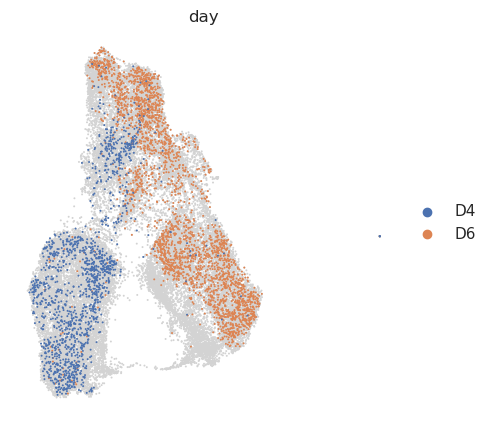

In [4]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[adata.obs.knockout == "Control"],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

#plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/control.pdf")

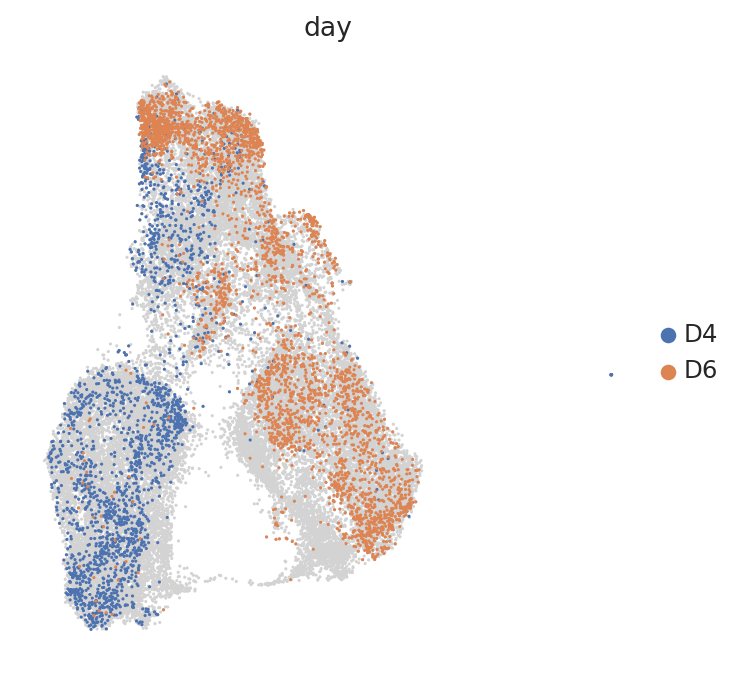

In [217]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[adata.obs.knockout == "BATF"],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/batf.pdf")

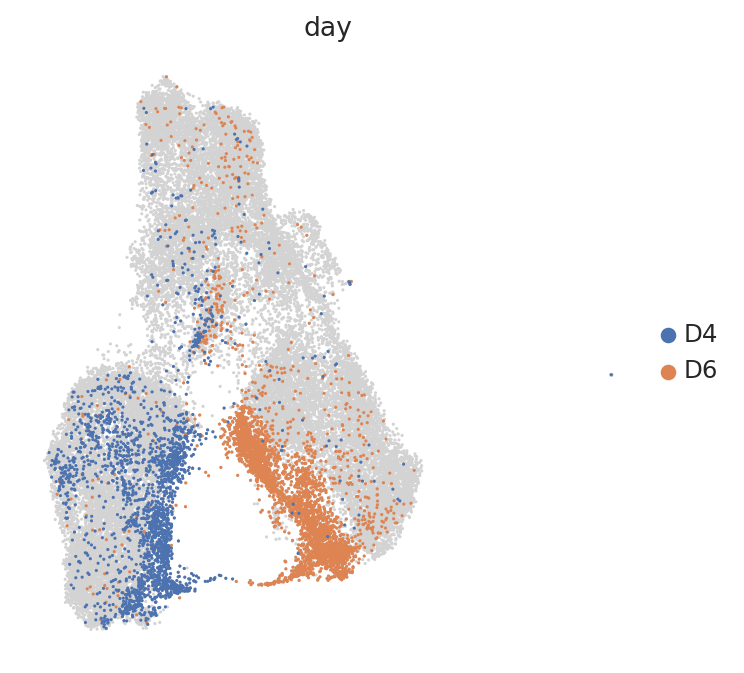

In [218]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[adata.obs.knockout == "IRF4"],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/irf4.pdf")

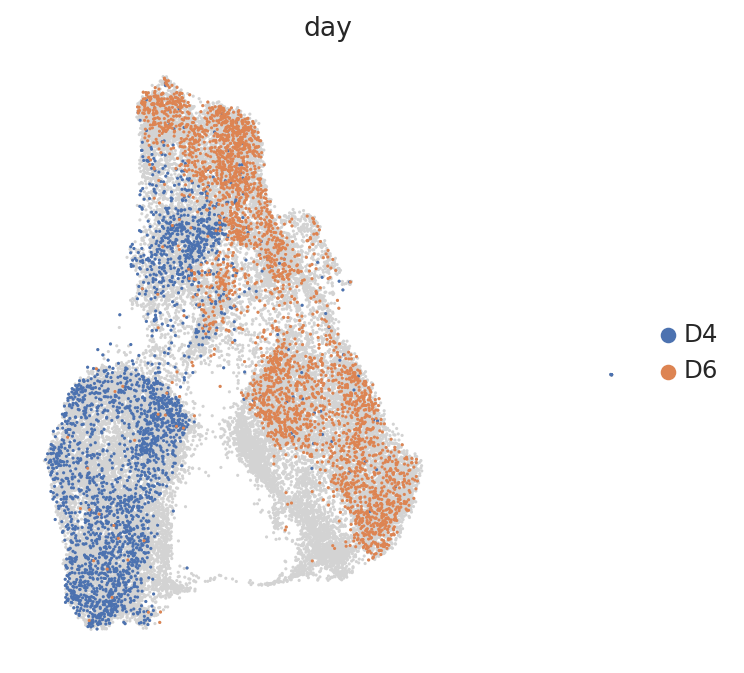

In [219]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[adata.obs.knockout == "IRF8" ],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/irf8.pdf")

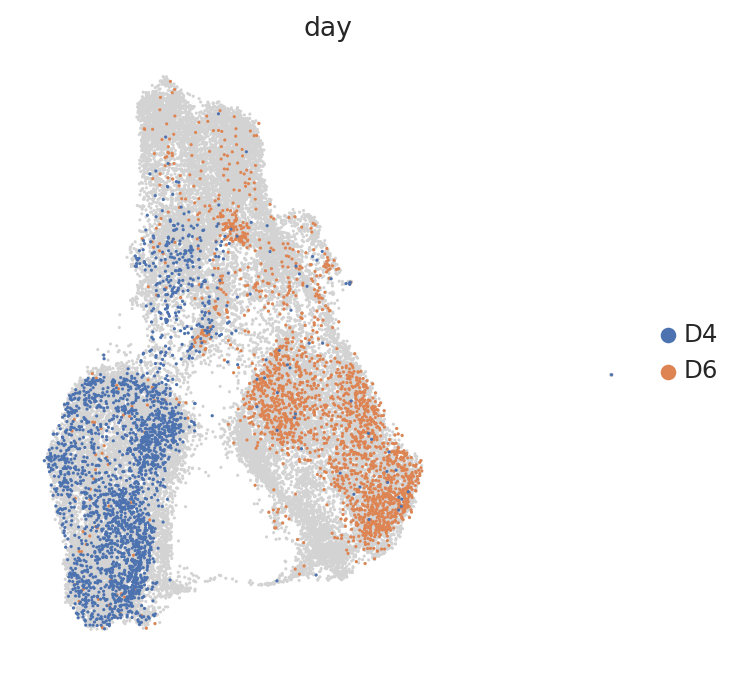

In [220]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[adata.obs.knockout == "PRDM1"],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/prdm1.pdf")

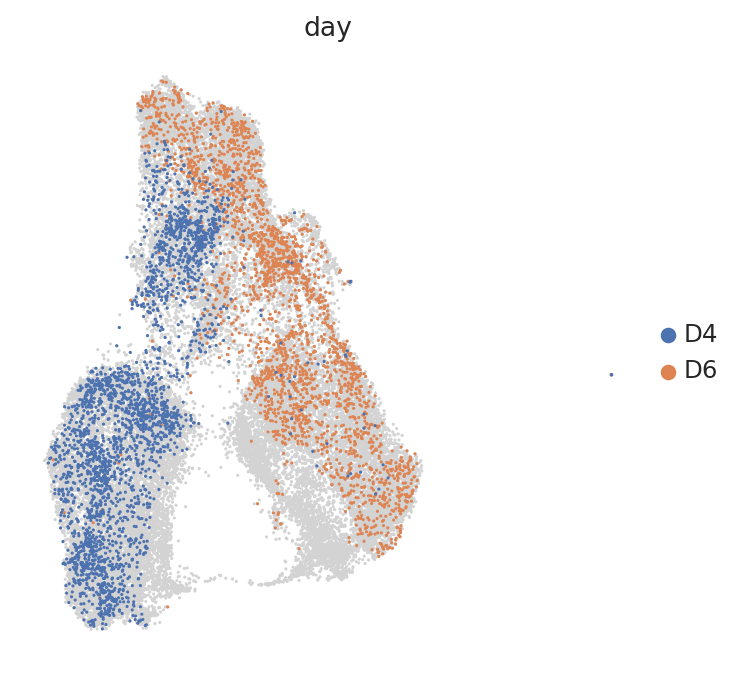

In [11]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(5,5)})

ax = sc.pl.umap(adata, size=8, show=False)
sc.pl.umap(
    adata[(adata.obs.knockout == "SPIB") & (adata.obs.replicate == "Rep2")],
    size=8,
    color="day",
    ax=ax,
    show=False,
    frameon=False
)

plt.savefig("/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/figures/spib_r2.pdf")

In [5]:
sc.tl.leiden(adata,resolution=0.25,random_state=6)

/scratch/slurm-3888204/ipykernel_46940/4105859883.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.25,random_state=6)


In [6]:
adata.uns['leiden_colors'] = ['dodgerblue', 'green', 'firebrick', 'black']

[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'PRDM1'}, xlabel='UMAP1', ylabel='UMAP2'>]

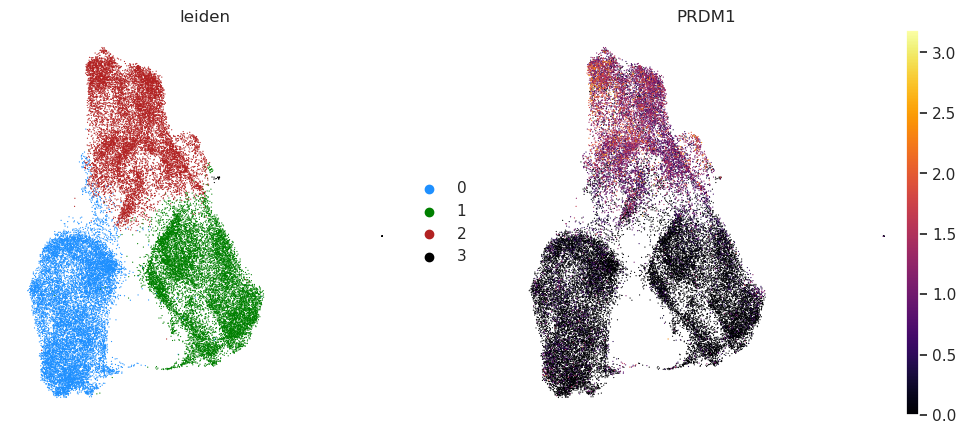

In [5]:

sc.pl.umap(adata, color=['leiden', "PRDM1"], s = 3, show=False, frameon=False, cmap='inferno')

In [7]:
# Create a mapping dictionary for leiden annotations
leiden_mapping = {
    '0': 'ActB',
    '1': 'GC',
    '2': 'PB',
    '3': 'NA'
}

# Create the new 'leiden_annotation' column by mapping the 'leiden' column
adata.obs['cell_type_annotation'] = adata.obs['leiden'].map(leiden_mapping)

In [9]:
adata.obs['cell_type_annotation'].unique()

['PB', 'GC', 'ActB', 'NA']
Categories (4, object): ['ActB', 'GC', 'PB', 'NA']

In [10]:
adata.obs['leiden'].unique()

['2', '1', '0', '3']
Categories (4, object): ['0', '1', '2', '3']

In [11]:
adata.obs['leiden_filtered_cells'] = ~adata.obs['leiden'].isin(["3"])
adata.obs['leiden_filtered_cells'].value_counts()

leiden_filtered_cells
True     35778
False       44
Name: count, dtype: int64

In [14]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'cell_type_annotation', 'leiden_filtered_cells'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_count

In [16]:
adata.obs['sample'] = adata.obs['group']
adata.uns['sample_colors'] = adata.uns['group_colors']

In [17]:
# Remove specified slots from adata.obs
slots_to_remove = [
    'group'
]

# Create a new AnnData object without the specified columns
adata.obs = adata.obs.drop(columns=slots_to_remove, errors='ignore')

adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'cell_type_annotation', 'leiden_filtered_cells', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_coun

In [ ]:
adata.write('/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/h5_files/tf_perturbseq_rep2_post_mira.h5ad')

# Figure 6 UMAPs

In [28]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sc.set_figure_params(scanpy=True, fontsize=20, dpi_save = 350)
sns.set(rc={'figure.figsize':(5,5)})
logging.getLogger("fontTools.subset").setLevel(logging.WARNING)

In [5]:
adata = sc.read_h5ad("/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/h5_files/tf_perturbseq_rep2_post_mira.h5ad")

In [26]:
adata = adata[adata.obs["leiden_filtered_cells"] == True].copy()

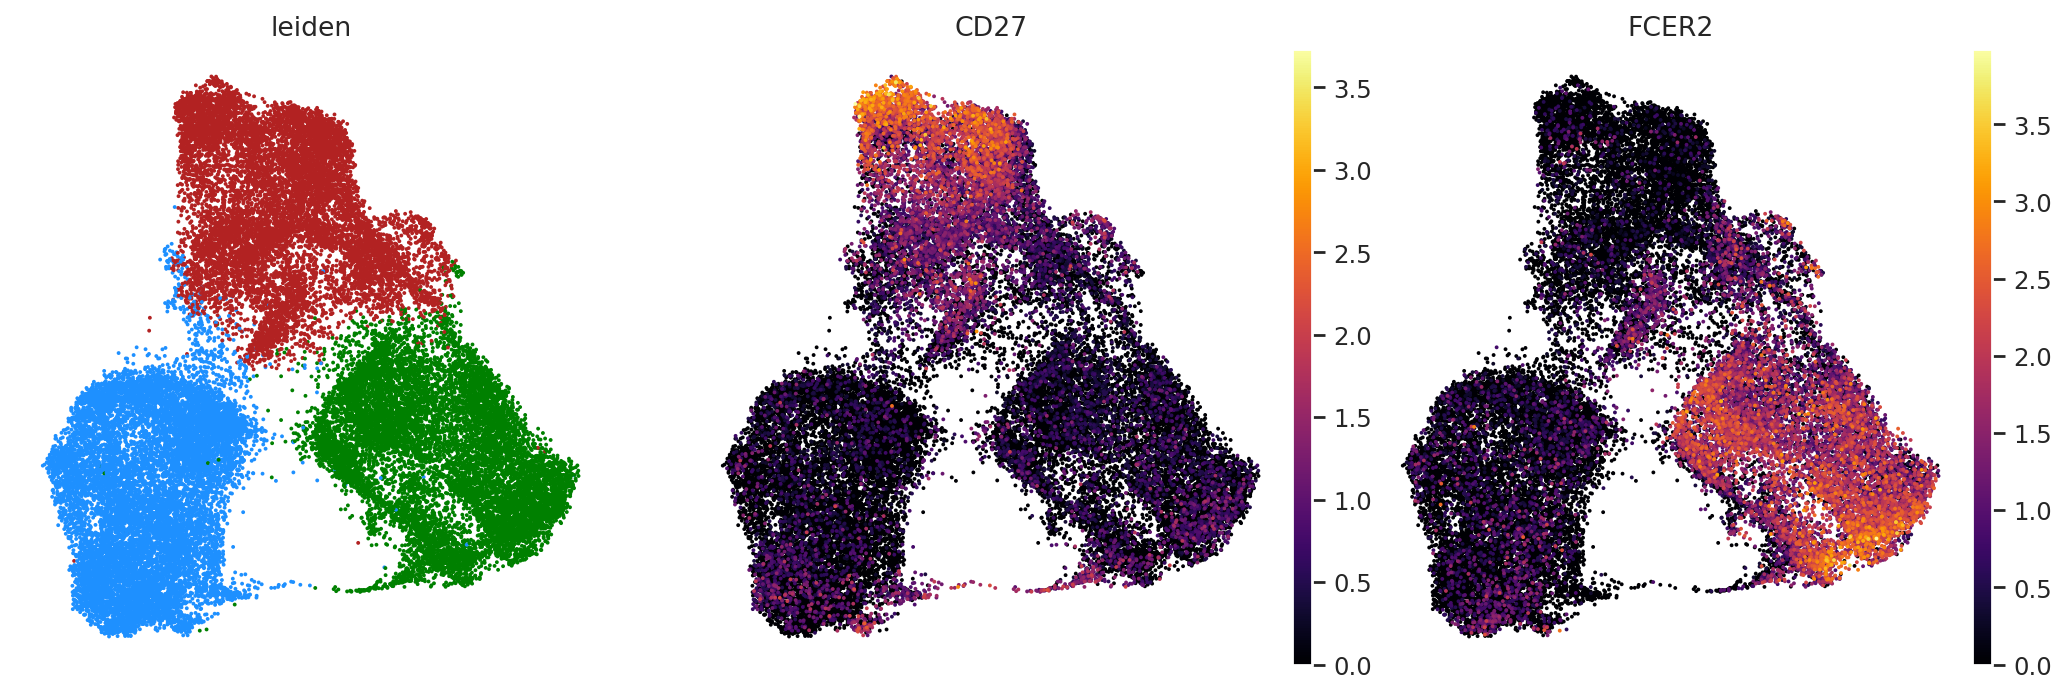

In [48]:
sc.pl.umap(adata, color=['leiden', 'CD27', 'FCER2'], s = 12, show=False, frameon=False, cmap='inferno', wspace=0.05, legend_loc=None)

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/plots/leiden_plot.pdf")

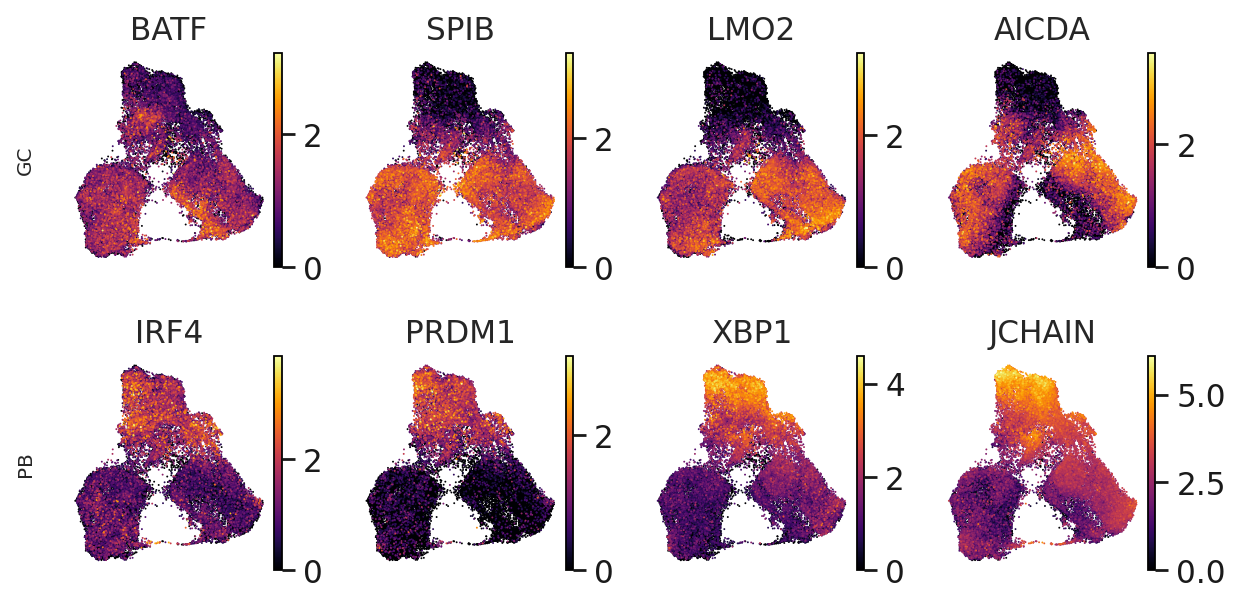

In [49]:
# In this example we want to show UMAPs of different cell type markers,
# with markers of a single cell type in one row
# and with a different number of markers per cell type (row)
sc.set_figure_params(scanpy=True, fontsize=14, dpi_save = 350)



# Marker genes
marker_genes= {
    'GC': ['BATF', 'SPIB', 'LMO2', 'AICDA'],
    'PB': ['IRF4', 'PRDM1', 'XBP1', 'JCHAIN']
}
# Make Axes
# Number of needed rows and columns (based on the row with the most columns)
nrow=len(marker_genes)
ncol=max([len(vs) for vs in marker_genes.values()])
fig,axs=plt.subplots(nrow,ncol,figsize=(2*ncol,2*nrow))
# Plot expression for every marker on the corresponding Axes object
for row_idx,(cell_type,markers) in enumerate(marker_genes.items()):
    col_idx=0
    for marker in markers:
        ax=axs[row_idx,col_idx]
        sc.pl.umap(adata,color=marker,ax=ax,show=False,frameon=False,s=3, legend_fontsize = 2, cmap = 'inferno')
        # Add cell type as row label - here we simply add it as ylabel of
        # the first Axes object in the row
        if col_idx==0:
            # We disabled axis drawing in UMAP to have plots without background and border
            # so we need to re-enable axis to plot the ylabel
            ax.axis('on')
            ax.tick_params(
                top='off', bottom='off', left='off', right='off',
                labelleft='on', labelbottom='off')
            ax.set_ylabel(cell_type+'\n', rotation=90, fontsize=9)
            ax.set_xlabel('')
            ax.set(frame_on=False)
        col_idx+=1
    # Remove unused column Axes in the current row
    while col_idx<ncol:
        axs[row_idx,col_idx].remove()
        col_idx+=1
# Alignment within the Figure
fig.tight_layout()

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/plots/gcpb_gcmarkers_inferno.pdf")

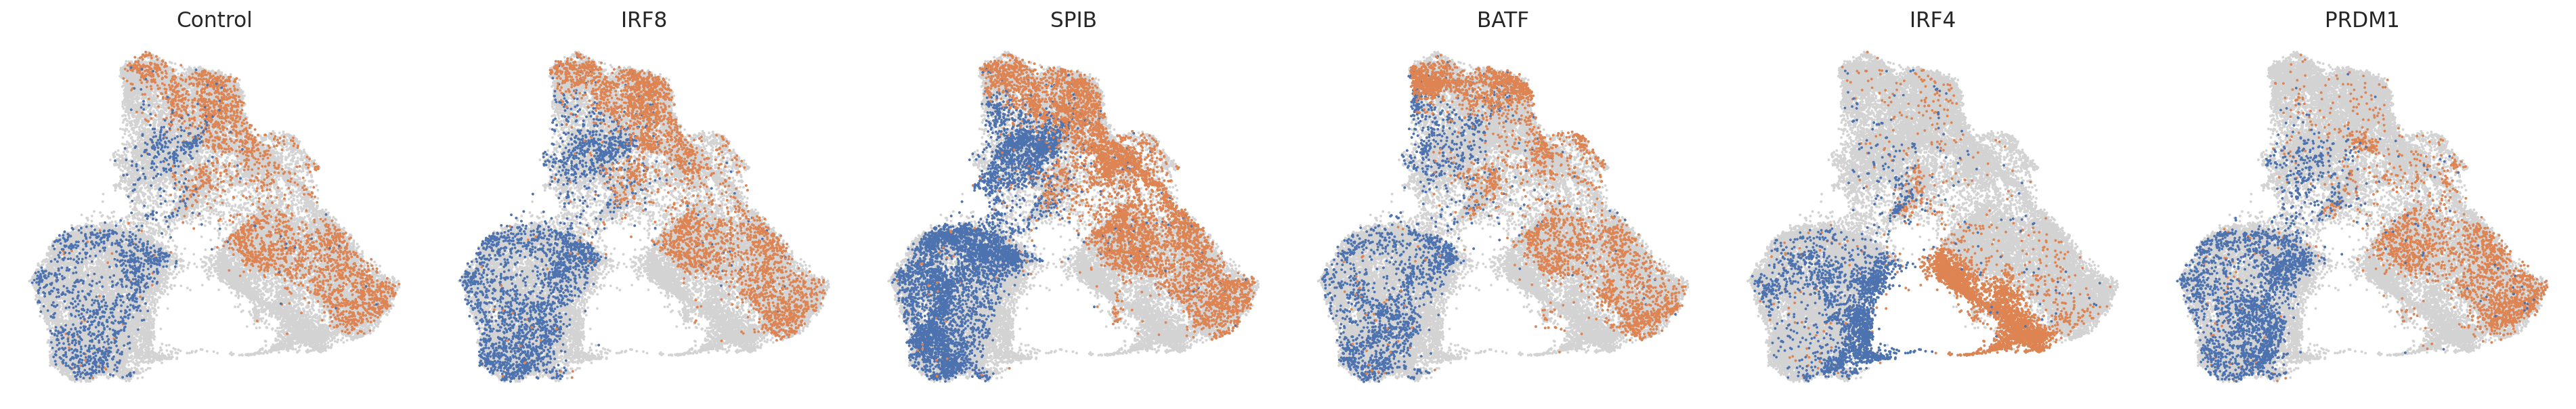

In [52]:
# List of transcription factors
tfs = ['Control', 'IRF8', 'SPIB', 'BATF', 'IRF4', 'PRDM1']

# Set up figure with one row and len(tfs) columns
fig, axes = plt.subplots(1, len(tfs), figsize=(len(tfs)*4, 4))

# Loop through transcription factors and plot each
for i, tf in enumerate(tfs):
    ax = axes[i]
    
    # Plot all cells in gray
    sc.pl.umap(
        adata,
        color=None,  # Don't color by anything
        size=12,
        ax=ax,
        show=False,
        frameon=False,
        wspace=0.05
    )
    
    # Overlay cells from the specific knockout colored by 'day'
    sc.pl.umap(
        adata[adata.obs['knockout'] == tf],
        color="day",
        size=12,
        ax=ax,
        show=False,
        frameon=False,
        title=tf,
        wspace=0.05,
        legend_loc=None
    )

fig.tight_layout()
fig.show()

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/plots/sample_by_day.pdf")

# cell number analysis

In [3]:
adata = sc.read_h5ad("/media/RAIDArray/Nick/projects/human_Bcell_GRN/20240206_PerturbSeq_Exp2/h5_files/tf_perturbseq_rep2_post_mira.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'cell_type_annotation', 'leiden_filtered_cells', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_coun

In [ ]:
sc.pl.umap(adata, color=['leiden', "cell_type_annotation", "sample"], s = 3, show=False, frameon=False, cmap='inferno')

In [19]:
#get cell numbers per cluster
cell_numbers = adata.obs.groupby(["leiden_annotation", "group"]).apply(len)

cell_numbers

/scratch/slurm-4682469/ipykernel_7525/2013249519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_numbers = adata.obs.groupby(["leiden_annotation", "group"]).apply(len)
/scratch/slurm-4682469/ipykernel_7525/2013249519.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cell_numbers = adata.obs.groupby(["leiden_annotation", "group"]).apply(len)


leiden_annotation  group      
ActB               D4_batf_r2     1451
                   D4_irf4_r2     2004
                   D4_irf8_r2     1981
                   D4_ntc_r2      1164
                   D4_prdm1_r2    2128
                   D4_spib_r1     2020
                   D4_spib_r2     1881
                   D6_batf_r2       40
                   D6_irf4_r2      101
                   D6_irf8_r2       29
                   D6_ntc_r2        44
                   D6_prdm1_r2      65
                   D6_spib_r1       32
                   D6_spib_r2       17
preGC              D4_batf_r2       31
                   D4_irf4_r2       47
                   D4_irf8_r2       35
                   D4_ntc_r2        20
                   D4_prdm1_r2      35
                   D4_spib_r1       26
                   D4_spib_r2       31
                   D6_batf_r2     1398
                   D6_irf4_r2     3037
                   D6_irf8_r2     1549
                   D6_ntc_r2     

In [20]:
cell_numbers.to_csv('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/cell_numbers_241217.csv')

In [8]:
adata.write('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/240401_merged.h5ad')

# DEG analysis

In [2]:
#reload anndata with topic model results, if necesseary
adata=sc.read_h5ad('/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/240401_merged.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'tota

In [3]:
adata_actb=adata[adata.obs['leiden']=='0'].copy()
adata_gc=adata[adata.obs['leiden']=='1'].copy()
adata_pb=adata[adata.obs['leiden']=='2'].copy()

In [9]:
import scanpy as sc

# Function to subset data, run differential expression analysis, and save results
def analyze_and_export(adata, group_1, group_2, key_prefix, file_prefix, day, cluster):
    # Subset the data
    adata_subset = adata[adata.obs['group'].isin([group_1, group_2])].copy()

    # Perform differential expression analysis
    key_added = f'deg_{key_prefix}'
    sc.tl.rank_genes_groups(
        adata_subset, 
        'group', 
        key_added=key_added,
        method='t-test_overestim_var',
        use_raw=False,
        pts=True
    )

    # Export the results to CSV
    df_de_gene = sc.get.rank_genes_groups_df(adata_subset, group=None, key=key_added)
    filename = f'/ix/djishnu/peasena/tf_perturbseq/20240206_perturbseq2/results/deg_{day}_{file_prefix}_{cluster}.csv'
    df_de_gene.to_csv(filename, header=True, index=False)

# Specify data and parameters for analysis
experiments = [
    {'adata': adata_actb, 'groups': [('D4_batf_r2', 'D4_ntc_r2'), ('D4_irf4_r2', 'D4_ntc_r2'), ('D4_irf8_r2', 'D4_ntc_r2'),
                                  ('D4_prdm1_r2', 'D4_ntc_r2'), ('D4_spib_r1', 'D4_ntc_r2'), ('D4_spib_r2', 'D4_ntc_r2')],
     'day': 'd4', 'cluster': 'actb'},
    {'adata': adata_gc, 'groups': [('D6_batf_r2', 'D6_ntc_r2'), ('D6_irf4_r2', 'D6_ntc_r2'), ('D6_irf8_r2', 'D6_ntc_r2'),
                                  ('D6_prdm1_r2', 'D6_ntc_r2'), ('D6_spib_r1', 'D6_ntc_r2'), ('D6_spib_r2', 'D6_ntc_r2')],
     'day': 'd6', 'cluster': 'gc'},
    {'adata': adata_pb, 'groups': [('D4_batf_r2', 'D4_ntc_r2'), ('D4_irf4_r2', 'D4_ntc_r2'), ('D4_irf8_r2', 'D4_ntc_r2'),
                                   ('D4_prdm1_r2', 'D4_ntc_r2'), ('D4_spib_r1', 'D4_ntc_r2'), ('D4_spib_r2', 'D4_ntc_r2')],
     'day': 'd4', 'cluster': 'pb'},
]

# Iterate over experiments and run analysis
for exp in experiments:
    adata = exp['adata']
    day = exp['day']
    cluster = exp['cluster']
    
    for group_1, group_2 in exp['groups']:
        tf = group_1.split('_')[1]  # Extract TF name from group_1
        analyze_and_export(adata, group_1, group_2, f"{day}_{tf}", tf, day, cluster)
